In [13]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict
from typing import Literal

In [14]:
class State(TypedDict):
    seed: int


graph_builder = StateGraph(State)

In [15]:
def node_one(state: State) -> State:
    return {"messages": ["Hello, nice to meet you"]}


def node_two(state: State) -> State:
    return {}


def node_three(state: State) -> State:
    return {}


def node_four(state: State) -> State:
    return {}


In [16]:
graph_builder.add_node("node_one", node_one)
graph_builder.add_node("node_two", node_two)
graph_builder.add_node("node_three", node_three)
graph_builder.add_node("node_four", node_four)


# def decide_path(state: State) -> Literal["node_three", "node_four"]:
#     if state["seed"] % 2 == 0:
#         return "node_three"
#     else:
#         return "node_four"


def decide_path(state: State):
    return state["seed"] % 2 == 0


graph_builder.add_edge(START, "node_one")
graph_builder.add_edge("node_one", "node_two")
graph_builder.add_conditional_edges(
    "node_two",
    decide_path,
    {
        True: "node_three",
        False: "node_four",
        "end": END,
    },
)
graph_builder.add_edge("node_four", END)


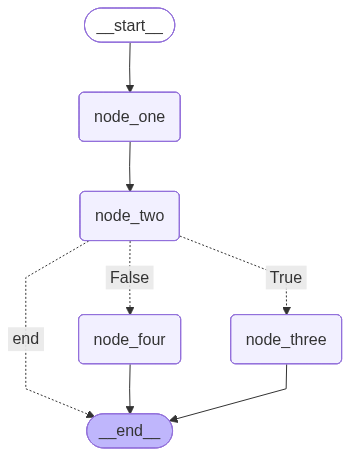

In [17]:
graph = graph_builder.compile()

graph


In [18]:
print(graph.invoke({"seed": 1}))


{'seed': 1}
